In [1]:
import sys
sys.path.append('..')

import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import torch
import pandas as pd
import seaborn as sns

labels = {
    'Background': 0,
    'Tubules': 1,
    # 'Vein': 2,
    'Vein / Indeterminate vessel ': 2,  # Same as Vein - relabelled
    'Artery': 3,
    'Glomeruli': 4
}

alpha = 1.0
# colors = [purple, red, green, yellow, blue]
colors = [(128/255, 0, 128/255, alpha), # purple (background)
            (1, 0, 0, alpha), # red (tubules)
            (1, 1, 0, alpha), # yellow (indeterminate)
            (0, 1, 0, alpha), # green (artery)
            (0, 0, 1, alpha)] # blue (glomeruli)
cmap = mcolors.ListedColormap(colors)

# NORM CALC

In [3]:
import matplotlib.colors as mcolors

with h5py.File('train_data_random.h5', 'r') as hf:
    imgs = hf['data'] # shape (N, H, W, C), dtype uint8, range 0-255
    masks = hf['labels'] # shape (N, H, W), dtype uint8, range 0-4

    # imgs = imgs / 255.0

    print(f"imgs mean: {np.mean(imgs)}, std: {np.std(imgs)}")

    # calculate mean and std of images
    mean = np.mean(imgs, axis=(0, 1, 2))
    std = np.std(imgs, axis=(0, 1, 2))

    print(f'train Mean: {mean}, Std: {std}')
    print(f'train Mean: {mean / 255.0}, Std: {std / 255.0}')


with h5py.File('test_data_random.h5', 'r') as hf:
    imgs = hf['data']
    masks = hf['labels']

    # imgs = imgs / 255.0

    print(f"imgs mean: {np.mean(imgs)}, std: {np.std(imgs)}")

    # calculate mean and std of images
    mean = np.mean(imgs, axis=(0, 1, 2))
    std = np.std(imgs, axis=(0, 1, 2))

    print(f'test Mean: {mean}, Std: {std}')
    print(f'test Mean: {mean / 255.0}, Std: {std / 255.0}')

imgs mean: 216.3533193477686, std: 33.40280602170216
train Mean: [223.81597692 205.35957121 219.88440992], Std: [27.47587472 40.64652016 27.40723803]
train Mean: [0.87770971 0.80533165 0.8622918 ], Std: [0.10774853 0.15939812 0.10747936]
imgs mean: 215.6351131021587, std: 32.825000685475814
test Mean: [223.55036308 204.07602498 219.27895124], Std: [26.68833428 39.96076919 26.71648353]
test Mean: [0.87666809 0.80029814 0.85991746], Std: [0.10466013 0.1567089  0.10477052]


# KIDNEY STRUCTURE EXAMPLES (SECTION 3.1.1 LABELS)

Mask 970 contains the most


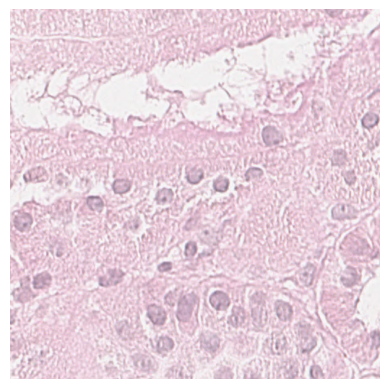

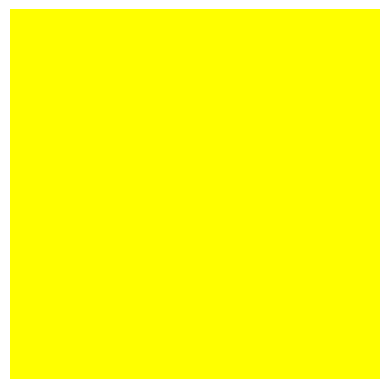

In [29]:
# import matplotlib.colors as mcolors

# with h5py.File('train_data.h5', 'r') as hf:
#     imgs = hf['data']
#     masks = hf['labels']

#     mask_with_most_id = 0

#     for idx, mask in enumerate(masks):
#         # find the mask that contains the most of label 4
#         if 1 in mask:
#             max = np.sum(masks[mask_with_most_id] == 1)
#             curr = np.sum(mask == 1)
            
#             if curr > max:
#                 mask_with_most_id = idx

#     print(f"Mask {mask_with_most_id} contains the most")

#     colors = ['purple', 'yellow', 'green', 'red', 'blue']
#     cmap = mcolors.ListedColormap(colors)

#     plt.imshow(imgs[mask_with_most_id])
#     plt.axis('off')
#     plt.show()

#     plt.imshow(masks[mask_with_most_id], cmap=cmap, vmin=0, vmax=4)
#     plt.axis('off')
#     plt.show()

In [ ]:
import matplotlib.colors as mcolors

with h5py.File('test_data.h5', 'r') as hf:
    imgs = hf['data']
    masks = hf['labels']

    colors = ['purple', 'yellow', 'green', 'red', 'blue']
    cmap = mcolors.ListedColormap(colors)

    # skip = 8
    counter = 0

    for idx, mask in enumerate(masks):
        if idx >= 0:
            if 2 in mask or 3 in mask or 4 in mask:
                continue

            if 1 in mask:

                # if skip > 0:
                #     skip -= 1
                #     continue

                print(f"Mask {idx}")

                fig, ax = plt.subplots(1, 2, figsize=(10, 5))

                ax[0].imshow(imgs[idx])
                ax[0].axis('off')
                ax[0].set_title('Image')

                ax[1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
                ax[1].axis('off')
                ax[1].set_title('Mask')

                plt.show()

                counter += 1

                if counter >= 20:
                    break


# Plot poorly delineated mask

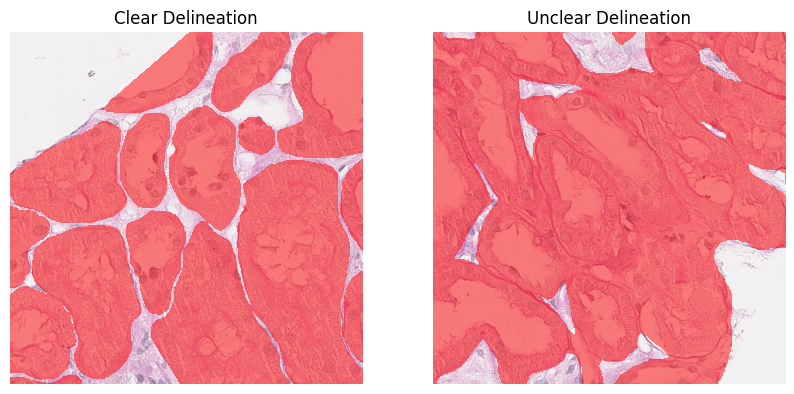

In [8]:
import matplotlib.colors as mcolors

with h5py.File('test_data.h5', 'r') as hf:
    imgs = hf['data']
    masks = hf['labels']

    alpha = 0.5
    # colors = [clear, red, green, yellow, blue]
    colors = [(128/255, 0, 128/255, 0), # purple (but transparent since alpha = 0)
              (1, 0, 0, alpha), # red
              (0, 1, 0, alpha), # green
              (1, 1, 0, alpha), # yellow
              (0, 0, 1, alpha)] # blue
    cmap = mcolors.ListedColormap(colors)

    img_1 = None
    mask_1 = None
    img_2 = None
    mask_2 = None

    for idx, mask in enumerate(masks):
        if idx == 0:
            img_1 = imgs[idx]
            mask_1 = mask
        elif idx == 1:
            img_2 = imgs[idx]
            mask_2 = mask
        else:
            break

    ############################################################

    # fig, ax = plt.subplots(2, 2, figsize=(8, 8))

    # ax[0, 0].imshow(img_1)
    # ax[0, 0].axis('off')
    # ax[0, 0].set_title('Image')

    # ax[0, 1].imshow(mask_1, cmap=cmap, vmin=0, vmax=4)
    # ax[0, 1].axis('off')
    # ax[0, 1].set_title('Mask')

    # ax[1, 0].imshow(img_2)
    # ax[1, 0].axis('off')
    # ax[1, 0].set_title('Image')

    # ax[1, 1].imshow(mask_2, cmap=cmap, vmin=0, vmax=4)
    # ax[1, 1].axis('off')
    # ax[1, 1].set_title('Indistinct Mask')

    # plt.savefig('poor_delineation.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.5)

    # plt.show()

    ############################################################

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img_1)
    ax[0].imshow(mask_1, cmap=cmap, vmin=0, vmax=4)
    ax[0].axis('off')
    ax[0].set_title('Clear Delineation')

    ax[1].imshow(img_2)
    ax[1].imshow(mask_2, cmap=cmap, vmin=0, vmax=4)
    ax[1].axis('off')
    ax[1].set_title('Unclear Delineation')

    plt.savefig('poor_delineation2.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

    ############################################################

    # for idx, mask in enumerate(masks):
    #     if idx == 0 or idx == 1:
    #         print(f"Mask {idx}")

    #         # fig, ax = plt.subplots()
    #         # ax.imshow(imgs[idx])
    #         # ax.imshow(mask, cmap=cmap, vmin=0, vmax=4)
    #         # ax.axis('off')
    #         # plt.show()

    #         fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    #         ax[0].imshow(imgs[idx])
    #         ax[0].axis('off')
    #         ax[0].set_title('Image')

    #         ax[1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    #         ax[1].axis('off')
    #         ax[1].set_title('Mask')

    #         # plt.savefig('poor_delineation.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.5)

    #         plt.show()

    #         break

# CLASS EXAMPLES TABLE

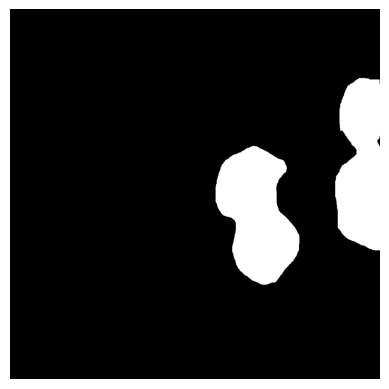

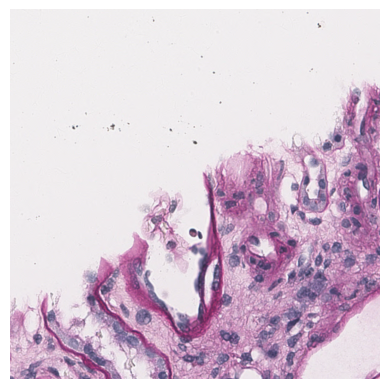

In [125]:
with h5py.File('test_data_random.h5', 'r') as hf:
    imgs = hf['data']
    masks = hf['labels']

    idx = 48
    label = 3
    mask = masks[idx]

    # convert mask such that label is 1 and all other labels are 0
    mask = (mask != label).astype(int)

    plt.imshow(mask, cmap='binary')
    plt.axis('off')
    plt.savefig('artery_mask.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.imshow(imgs[idx])
    plt.axis('off')
    plt.savefig('artery_img.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()

# DATASET CLASS DIAGRAM

In [ ]:
# from utils.get_dataloaders import get_train_loaders, get_test_loader
# from utils.dataset import BasicDataset
# import matplotlib.colors as mcolors

# SEED = 42
# torch.manual_seed(SEED)
# train_file = 'train_data_random.h5'
# train_set = BasicDataset(train_file, augment=False, calc_edge_map=False)

# colors = ['purple', 'yellow', 'green', 'red', 'blue']
# cmap = mcolors.ListedColormap(colors)

# for i in range(200):
#     img, mask, edge_map = train_set.__getitem__(i)

#     if 4 in mask:

#         img = img / 255.0
#         img = img.permute(1, 2, 0).cpu().numpy()
#         mask = mask.cpu().numpy()
#         edge_map = edge_map.cpu().numpy()

#         print(f"idx {i}")
        
#         fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#         ax[0].imshow(img)
#         ax[0].axis('off')
#         ax[0].set_title('Image')

#         ax[1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
#         ax[1].axis('off')
#         ax[1].set_title('Mask')

#         ax[2].imshow(edge_map, cmap='binary')
#         ax[2].axis('off')
#         ax[2].set_title('Edge Map')

#         plt.tight_layout()
#         plt.show()

In [2]:
import matplotlib.colors as mcolors

def plot_three(img, mask, edge_map):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title('Image')

    ax[1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    ax[1].axis('off')
    ax[1].set_title('Mask')

    ax[2].imshow(edge_map, cmap='binary')
    ax[2].axis('off')
    ax[2].set_title('Edge Map')

    plt.tight_layout()
    plt.show()

In [ ]:
from utils.get_dataloaders import get_train_loaders, get_test_loader
from utils.dataset import BasicDataset
import matplotlib.colors as mcolors

SEED = 42
torch.manual_seed(SEED)
train_file = 'train_data_random.h5'
train_set = BasicDataset(train_file, augment=False, calc_edge_map=True)

#############################

img, mask, edge_map = train_set.__getitem__(116)

img = img.permute(1, 2, 0).cpu().numpy()
mask = mask.cpu().numpy()
edge_map = edge_map.cpu().numpy()

# plot_three(img, mask, edge_map)

plt.imshow(img)
plt.axis('off')
plt.savefig('dataset_img_pre.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.imshow(mask, cmap=cmap, vmin=0, vmax=4)
plt.axis('off')
plt.savefig('dataset_mask_pre.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.imshow(edge_map, cmap='binary')
plt.axis('off')
plt.savefig('dataset_edge_map_pre.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

#############################

train_set_aug = BasicDataset(train_file, augment=True, calc_edge_map=True)

img2, mask2, edge_map2 = train_set_aug.__getitem__(116)

img2 = img2.permute(1, 2, 0).cpu().numpy()
mask2 = mask2.cpu().numpy()
edge_map2 = edge_map2.cpu().numpy()

plt.imshow(img2)
plt.axis('off')
plt.savefig('dataset_img_post.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.imshow(mask2, cmap=cmap, vmin=0, vmax=4)
plt.axis('off')
plt.savefig('dataset_mask_post.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.imshow(edge_map2, cmap='binary')
plt.axis('off')
plt.savefig('dataset_edge_map_post.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# plot_three(img2, mask2, edge_map2)